In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
fname = 'power_speed.txt'
df1 = pd.read_csv(fname,header=None,skiprows=2,delimiter="\t",names=['Vs','PB','ns'])
print(df1)

   Vs   PB    ns
0   3    2   550
1   5    8   900
2   8   30  1500
3  10   75  2000
4  12  150  2500
5  14  200  3000


In [ ]:
def f(x,a,b):
    return a * x**b

In [ ]:
[a_PV, b_PV] , pcov_PV = curve_fit(f, df1.Vs, df1.PB)
[a_Pn, b_Pn] , pcov_Pn = curve_fit(f, df1.ns, df1.PB)

In [ ]:
f(1,a_PV,b_PV)

0.0966015966617165

In [ ]:
f(2,a_PV,b_PV)

0.7248312503811142

In [ ]:
f(3,a_PV,b_PV)

2.356279808016664

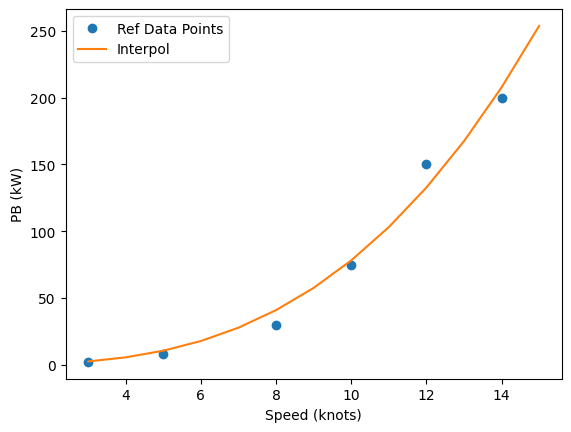

In [ ]:
Vs_values = np.linspace(3, 15, num = 13, endpoint=True)
PV_values = f(Vs_values,a_PV,b_PV)
plt.plot(df1.Vs,df1.PB,'o',label = "Ref Data Points")
plt.plot(Vs_values,PV_values, label = "Interpol")
plt.ylabel('PB (kW)')
plt.xlabel('Speed (knots)')
plt.legend()

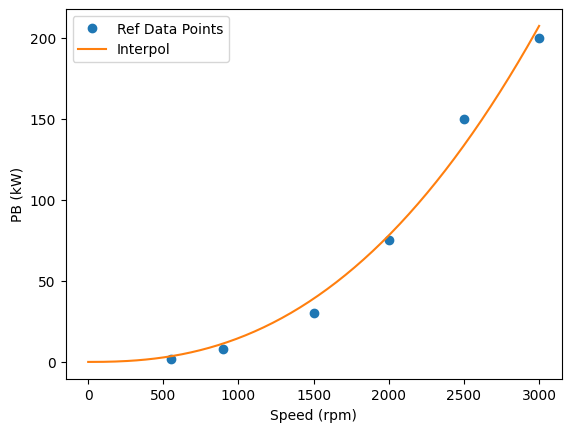

In [ ]:
ns_values = np.linspace(1, 3000, num = 150, endpoint=True)
Pn_values = f(ns_values,a_Pn,b_Pn)
plt.plot(df1.ns,df1.PB,'o',label = "Ref Data Points")
plt.plot(ns_values,Pn_values, label = "Interpol")
plt.ylabel('PB (kW)')
plt.xlabel('Speed (rpm)')
plt.legend()